In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(URL-HTML cross)(3).csv")
data.head()

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish,mlp_prediction_spam,mlp_prediction_malware,mlp_prediction_defacemen,nn_prediction_spam,nn_prediction_malware,nn_prediction_defacemen,nn2_prediction_spam,nn2_prediction_malware,nn2_prediction_defacemen
0,0,3.915539e-60,2.680158e-220,3.915539e-60,2.680158e-220,3.915539e-60,2.680158e-220,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
1,3,2.884644e-06,3.835707e-05,2.884644e-06,3.835707e-05,2.884644e-06,3.835707e-05,2.711595e-23,9.999588e-01,7.637224e-26,2.711595e-23,9.999588e-01,7.637224e-26,2.711595e-23,9.999588e-01,7.637224e-26
2,0,5.905090e-01,2.197333e-01,5.905090e-01,2.197333e-01,5.905090e-01,2.197333e-01,1.595286e-02,1.405232e-02,1.597526e-01,1.595286e-02,1.405232e-02,1.597526e-01,1.595286e-02,1.405232e-02,1.597526e-01
3,1,2.825485e-02,4.110084e-01,2.825485e-02,4.110084e-01,2.825485e-02,4.110084e-01,2.974864e-02,6.680746e-03,5.243073e-01,2.974864e-02,6.680746e-03,5.243073e-01,2.974864e-02,6.680746e-03,5.243073e-01
4,1,1.825027e-43,3.029391e-36,1.825027e-43,3.029391e-36,1.825027e-43,3.029391e-36,1.000000e+00,3.531859e-183,6.471977e-232,1.000000e+00,3.531859e-183,6.471977e-232,1.000000e+00,3.531859e-183,6.471977e-232


In [4]:
data.shape

(6896, 16)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish', 'mlp_prediction_spam', 'mlp_prediction_malware',
       'mlp_prediction_defacemen', 'nn_prediction_spam',
       'nn_prediction_malware', 'nn_prediction_defacemen',
       'nn2_prediction_spam', 'nn2_prediction_malware',
       'nn2_prediction_defacemen'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   mlp_prediction_non        6896 non-null   float64
 2   mlp_prediction_phish      6896 non-null   float64
 3   nn_prediction_non         6896 non-null   float64
 4   nn_prediction_phish       6896 non-null   float64
 5   nn2_prediction_non        6896 non-null   float64
 6   nn2_prediction_phish      6896 non-null   float64
 7   mlp_prediction_spam       6896 non-null   float64
 8   mlp_prediction_malware    6896 non-null   float64
 9   mlp_prediction_defacemen  6896 non-null   float64
 10  nn_prediction_spam        6896 non-null   float64
 11  nn_prediction_malware     6896 non-null   float64
 12  nn_prediction_defacemen   6896 non-null   float64
 13  nn2_prediction_spam       6896 non-null   float64
 14  nn2_pred

In [7]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [8]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [9]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))


Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1983 - accuracy: 0.6325 - val_loss: 0.1598 - val_accuracy: 0.7101
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.6724 - val_loss: 0.1092 - val_accuracy: 0.7101
Epoch 3/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0976 - accuracy: 0.8013 - val_loss: 0.0807 - val_accuracy: 0.8116
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.8468 - val_loss: 0.0654 - val_accuracy: 0.8638
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.8566 - val_loss: 0.0565 - val_accuracy: 0.8667
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.8588 - val_loss: 0.0507 - val_accuracy: 0.8739
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.8606 - val_loss: 0.0473 - val_accuracy: 0.8739

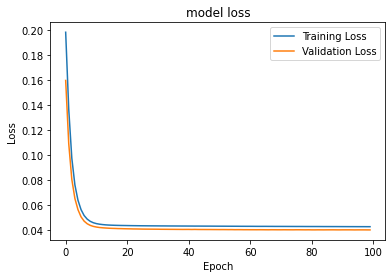

Validation Accuracy: 
Accuracy: 0.8826086956521739
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       220
           1       0.88      0.65      0.75        80
           2       0.83      0.95      0.88       135
           3       0.97      0.94      0.96       176
           4       0.76      0.94      0.84        79

    accuracy                           0.88       690
   macro avg       0.87      0.87      0.86       690
weighted avg       0.89      0.88      0.88       690

[[189   3  18   0  10]
 [ 10  52   4   5   9]
 [  3   1 128   0   3]
 [  3   2   4 166   1]
 [  3   1   1   0  74]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1416 - accuracy: 0.5224 - val_loss: 0.0951 - val_accuracy: 0.7928
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0783 - accuracy: 0.8268 - val_loss: 0.0697 - val_accuracy: 0.8449
Epoch 3/100
194/194 [==============================] - 0s 

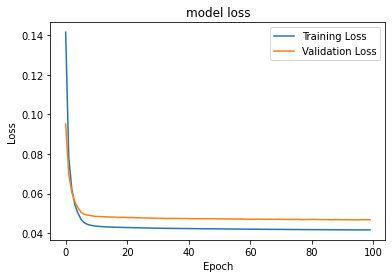

Validation Accuracy: 
Accuracy: 0.8652173913043478
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       231
           1       0.83      0.69      0.75        75
           2       0.80      0.89      0.84       145
           3       0.94      0.92      0.93       146
           4       0.77      0.95      0.85        93

    accuracy                           0.87       690
   macro avg       0.85      0.86      0.85       690
weighted avg       0.87      0.87      0.87       690

[[194   3  26   3   5]
 [  8  52   4   4   7]
 [  5   3 129   1   7]
 [  1   4   0 134   7]
 [  2   1   2   0  88]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1133 - accuracy: 0.7079 - val_loss: 0.0765 - val_accuracy: 0.7971
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.8021 - val_loss: 0.0606 - val_accuracy: 0.7957
Epoch 3/100
194/194 [==============================] - 1s 

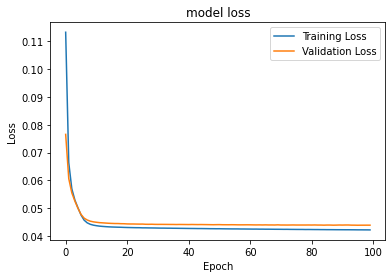

Validation Accuracy: 
Accuracy: 0.8681159420289855
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       225
           1       0.82      0.73      0.77        70
           2       0.80      0.91      0.85       134
           3       1.00      0.88      0.94       164
           4       0.75      0.93      0.83        97

    accuracy                           0.87       690
   macro avg       0.86      0.86      0.85       690
weighted avg       0.88      0.87      0.87       690

[[191   3  20   0  11]
 [  8  51   6   0   5]
 [  1   2 122   0   9]
 [  4   6   4 145   5]
 [  6   0   1   0  90]]
Epoch 1/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1057 - accuracy: 0.8057 - val_loss: 0.0634 - val_accuracy: 0.8580
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.8656 - val_loss: 0.0502 - val_accuracy: 0.8594
Epoch 3/100
194/194 [==============================] - 1s 

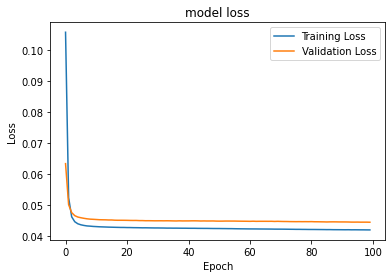

Validation Accuracy: 
Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       204
           1       0.86      0.65      0.74        94
           2       0.87      0.94      0.90       136
           3       0.94      0.91      0.93       164
           4       0.77      0.97      0.86        92

    accuracy                           0.87       690
   macro avg       0.86      0.86      0.86       690
weighted avg       0.87      0.87      0.87       690

[[172   3  11   4  14]
 [ 15  61   5   6   7]
 [  2   3 128   0   3]
 [  5   4   3 150   2]
 [  3   0   0   0  89]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1235 - accuracy: 0.7472 - val_loss: 0.0706 - val_accuracy: 0.8464
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0575 - accuracy: 0.8626 - val_loss: 0.0540 - val_accuracy: 0.8478
Epoch 3/100
194/194 [==============================] - 1s 

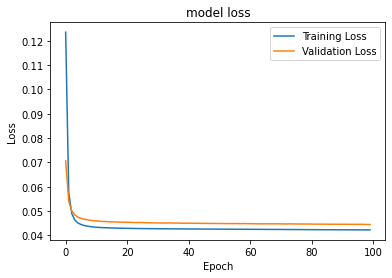

Validation Accuracy: 
Accuracy: 0.8681159420289855
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       212
           1       0.77      0.66      0.71        73
           2       0.83      0.87      0.85       125
           3       0.98      0.92      0.95       166
           4       0.75      0.91      0.83       114

    accuracy                           0.87       690
   macro avg       0.85      0.85      0.85       690
weighted avg       0.87      0.87      0.87       690

[[185   4  12   1  10]
 [  7  48   6   1  11]
 [  2   4 109   1   9]
 [  4   4   1 153   4]
 [  4   2   4   0 104]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1645 - accuracy: 0.5424 - val_loss: 0.1036 - val_accuracy: 0.7870
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.8041 - val_loss: 0.0661 - val_accuracy: 0.8681
Epoch 3/100
194/194 [==============================] - 0s 

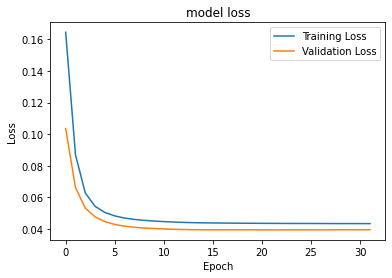

Validation Accuracy: 
Accuracy: 0.8797101449275362
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       239
           1       0.82      0.74      0.78        76
           2       0.87      0.94      0.90       139
           3       0.93      0.90      0.91       136
           4       0.79      0.88      0.83       100

    accuracy                           0.88       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.88      0.88      0.88       690

[[211   1  14   2  11]
 [  8  56   4   3   5]
 [  3   1 130   1   4]
 [  4   7   0 122   3]
 [  4   3   2   3  88]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1361 - accuracy: 0.6812 - val_loss: 0.0859 - val_accuracy: 0.8084
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.8247 - val_loss: 0.0585 - val_accuracy: 0.8621
Epoch 3/100
194/194 [==============================] - 0s 

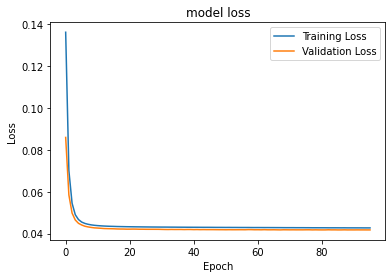

Validation Accuracy: 
Accuracy: 0.8809869375907112
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       210
           1       0.83      0.66      0.73        73
           2       0.88      0.92      0.90       145
           3       0.96      0.94      0.95       166
           4       0.75      0.89      0.82        95

    accuracy                           0.88       689
   macro avg       0.87      0.86      0.86       689
weighted avg       0.88      0.88      0.88       689

[[185   1   9   1  14]
 [  9  48   5   4   7]
 [  3   2 133   1   6]
 [  3   4   2 156   1]
 [  5   3   2   0  85]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1250 - accuracy: 0.6628 - val_loss: 0.0789 - val_accuracy: 0.8650
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.8627 - val_loss: 0.0558 - val_accuracy: 0.8650
Epoch 3/100
194/194 [==============================] - 0s 

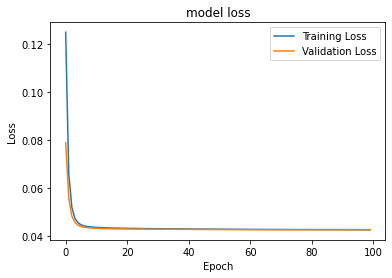

Validation Accuracy: 
Accuracy: 0.8737300435413643
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       224
           1       0.89      0.63      0.73        75
           2       0.85      0.94      0.89       133
           3       0.96      0.92      0.94       151
           4       0.76      0.94      0.84       106

    accuracy                           0.87       689
   macro avg       0.87      0.86      0.86       689
weighted avg       0.88      0.87      0.87       689

[[191   3  15   1  14]
 [ 13  47   3   5   7]
 [  2   0 125   0   6]
 [  4   2   2 139   4]
 [  3   1   2   0 100]]
Epoch 1/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1246 - accuracy: 0.6892 - val_loss: 0.0770 - val_accuracy: 0.8389
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0612 - accuracy: 0.8605 - val_loss: 0.0580 - val_accuracy: 0.8476
Epoch 3/100
194/194 [==============================] - 1s 

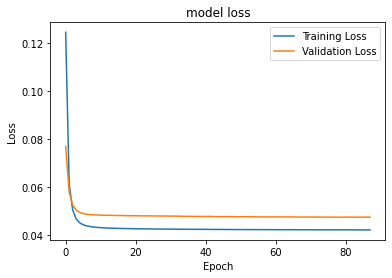

Validation Accuracy: 
Accuracy: 0.8592162554426706
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       209
           1       0.79      0.65      0.71        69
           2       0.80      0.89      0.84       132
           3       0.95      0.91      0.93       161
           4       0.79      0.92      0.85       118

    accuracy                           0.86       689
   macro avg       0.85      0.84      0.84       689
weighted avg       0.86      0.86      0.86       689

[[176   4  17   2  10]
 [ 10  45   4   3   7]
 [  2   3 117   3   7]
 [  5   3   2 146   5]
 [  2   2   6   0 108]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1515 - accuracy: 0.4758 - val_loss: 0.1040 - val_accuracy: 0.6517
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0836 - accuracy: 0.7553 - val_loss: 0.0643 - val_accuracy: 0.8824
Epoch 3/100
194/194 [==============================] - 1s 

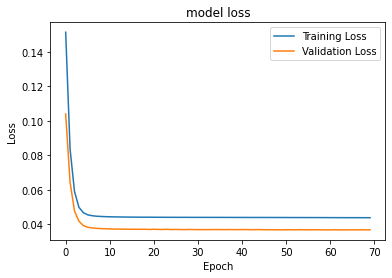

Validation Accuracy: 
Accuracy: 0.895500725689405
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       207
           1       0.85      0.69      0.76        64
           2       0.89      0.94      0.91       144
           3       0.95      0.93      0.94       158
           4       0.85      0.94      0.89       116

    accuracy                           0.90       689
   macro avg       0.89      0.87      0.88       689
weighted avg       0.90      0.90      0.89       689

[[182   2  10   3  10]
 [ 10  44   5   3   2]
 [  4   1 135   0   4]
 [  4   3   1 147   3]
 [  3   2   1   1 109]]


In [10]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)